In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATA
data = pd.read_csv('billionaire_data.csv')

print(data.head())

                       Name NetWorth        Country         Source  Rank  \
0                Jeff Bezos   $177 B  United States         Amazon     1   
1                 Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2  Bernard Arnault & family   $150 B         France           LVMH     3   
3                Bill Gates   $124 B  United States      Microsoft     4   
4           Mark Zuckerberg    $97 B  United States       Facebook     5   

    Age          Industry  
0  57.0        Technology  
1  49.0        Automotive  
2  72.0  Fashion & Retail  
3  65.0        Technology  
4  36.0        Technology  


In [2]:
# CHECK FOR NULL OR MISSING VALUES
print(data.isnull().sum())

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64


In [3]:
# DROP ROWS WITH MISSING AGE
data = data.dropna()

In [4]:
# PREPROCESS NETWORTH DATA $<NUMBER>B -> <NUMBER>
data['NetWorth'] = data['NetWorth'].str.strip('$B')
data['NetWorth'] = data['NetWorth'].astype(float)

print(data['NetWorth'].head())

0    177.0
1    151.0
2    150.0
3    124.0
4     97.0
Name: NetWorth, dtype: float64


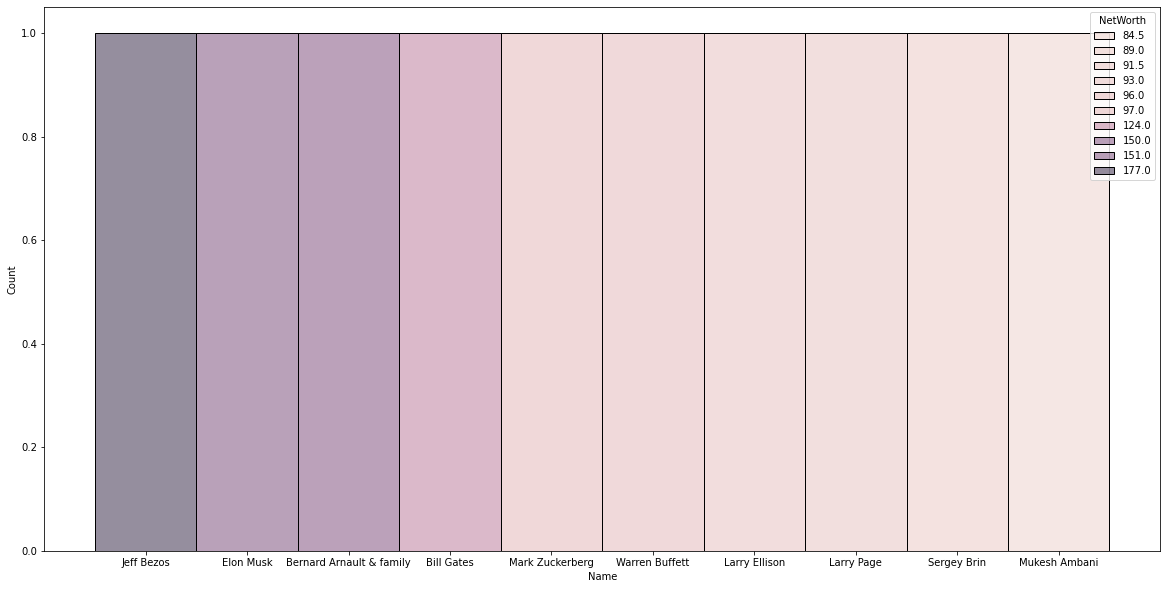

In [6]:
# PLOT TOP 10 RICHEST BILLIONAIRES
sort_data = data.sort_values(by = ['NetWorth'], ascending=False).head(10)
plt.figure(figsize=(20,10),facecolor='white')
sns.histplot(x='Name',hue='NetWorth',data=sort_data)
plt.show()

In [19]:
def top_billionaires_by_attribute(data,attribute,n=5):
    # PLOT TOP 5 ATTRIBUTE OF BILLIONAIRES
    source_freq = data[attribute].value_counts().head(n)
    index = source_freq.index
    source = source_freq.values
    custom_colors = ['lightgreen','lightblue','turquoise','tomato','pink']
    plt.figure(figsize=(20,10),facecolor='white')
    plt.pie(source, labels=index, colors=custom_colors)
    plt.rc('font',size=12)
    plt.title(f'Top 5 {attribute} with most number of Billionaire', fontsize=20)

    # ADD CIRCLE IN CENTER IMPROVE AESTHETICS
    circle = plt.Circle((0,0), 0.5, color='white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)
    plt.show()

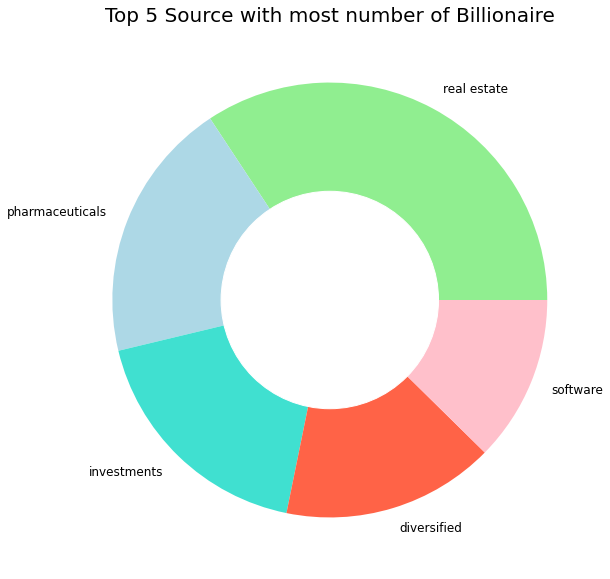

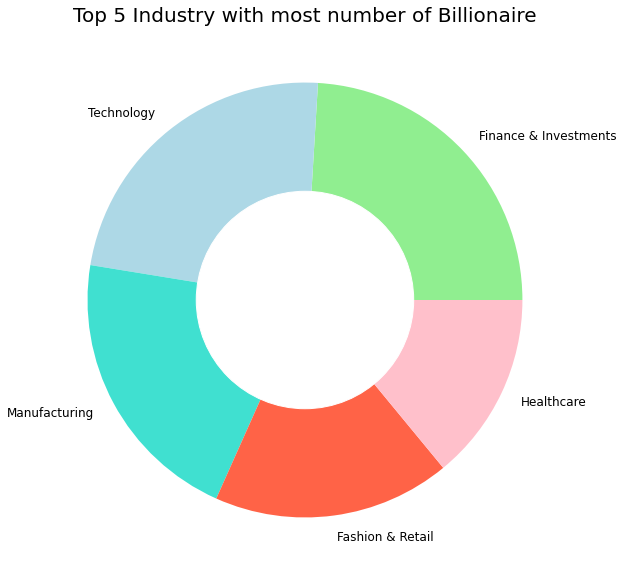

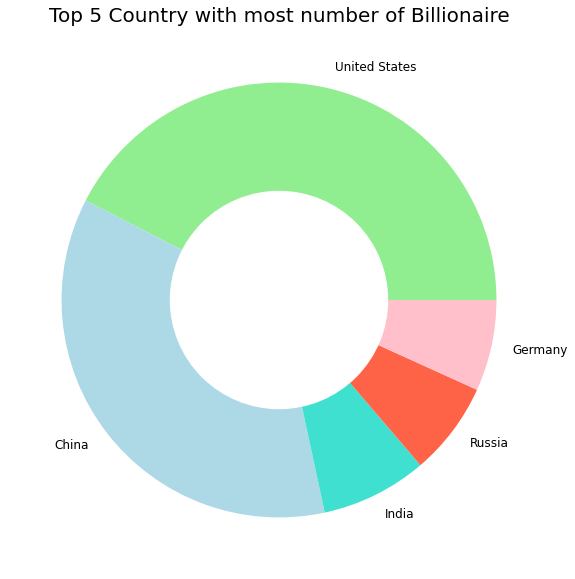

In [20]:
# PLOT TOP 5 SOURCES OF BILLIONAIRES
top_billionaires_by_attribute(data,'Source',5)

# PLOT TOP 5 INDUSTRIES OF BILLIONAIRES
top_billionaires_by_attribute(data,'Industry',5)

# PLOT TOP 5 INDUSTRIES OF BILLIONAIRES
top_billionaires_by_attribute(data,'Country',5)